# P3 Concevez une application au service de la santé publique 

L'agence <span style='color:blue'> <a href = "http://www.santepubliquefrance.fr/">"*Santé publique France*" </a></span> a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. <br>
Vous souhaitez y participer et proposer une idée d’application.

Le jeu de données <font color='orange'>Open Food Facts</font> est disponible sur le <a href = "https://world.openfoodfacts.org/">site officiel</a> (ou disponible à <a href ="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip">ce lien</a> en téléchargement).
<br>
Les variables sont définies à <a href = "https://world.openfoodfacts.org/data/data-fields.txt">cette adresse</a>

Les champs sont séparés en quatre sections :

- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

Notre idée est de créer une application mobile nommé livebetterandlonger

Cette application permettra au utilisateur d'ameliorer leur alimentaion, en leur proposant lors de l'achat des course d'obtenir une liste de produit similaire plus sain, c'est à dire en terme possedant un meilleur nutriscore. 


Comment:
lors de la selection d'un aliment, grace à son smartphone le client scannera le code barre de l'aliment, et obtiendra une liste de produit ordonnée par qualité nutritive au moins aussi interressant que le produit scanné.

Ce notebook a pour vocation à détailler le processus de nettoyage et de traitement necessaire pour la mise en place de notre application lookalike.

Les données sont toutes issues de l'initiative Open Food Facts dans le cadre de l'appel à projets de l'Agence Santé Publique France.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import os

import missingno as msno

In [3]:
%%time
if os.path.exists("fr.openfoodfacts.org.products.csv"):
    openfoodfacts = pd.read_csv("fr.openfoodfacts.org.products.csv",sep='\t',low_memory=False)

CPU times: total: 16.7 s
Wall time: 17.3 s


prendre 1 echant en parametre / 
figer typ de chaq col

In [4]:
openfoodfacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


Le fichier comtient 106 variables numeriques et 56 varriables catégoriques.
Il y a trop de données pour tout afficher dans une cellule resultant de la methode info().
Nous etudirons les colonnes de type 'object' dans un premier temps.

In [5]:
pd.options.display.max_columns=60
openfoodfacts[openfoodfacts.columns[(openfoodfacts.dtypes==object) ].to_list()].describe().T

,count,unique,top,freq
code,320749,320749,0000000003087,1
url,320749,320749,http://world-fr.openfoodfacts.org/produit/0000...,1
creator,320770,3535,usda-ndb-import,169868
created_t,320769,189567,1489077120,20
created_datetime,320763,189568,2017-03-09T10:37:09Z,20
last_modified_t,320772,180495,1439141742,33
last_modified_datetime,320772,180495,2015-08-09T17:35:42Z,33
product_name,303010,221347,Ice Cream,410
generic_name,52795,38584,Pâtes alimentaires au blé dur de qualité supér...,201
quantity,104819,13826,500 g,4669


</br>

In [6]:
#elargir la taille de la cellule
pd.set_option('max_colwidth', -1)

C:\Users\eleor\AppData\Local\Temp\ipykernel_15468\916695246.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


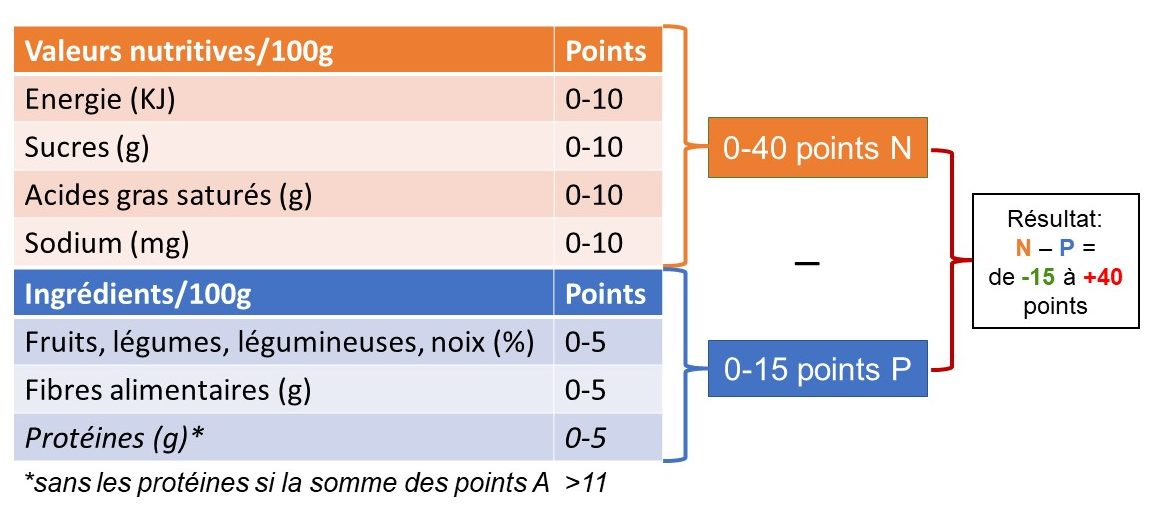

In [7]:
openfoodfacts.columns[(openfoodfacts.dtypes!=object) ].to_list()

['no_nutriments',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'montanic-acid_100g',
 'melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'elaidic-acid_100g',
 'gondoic-acid_100g',
 'mead-aci

In [ ]:
### Nutriscore calcul

In [115]:
openfoodfacts[openfoodfacts['nutrition-score-fr_100g'].notna()][columnsNS].copy().corr()\
.style.background_gradient(cmap = sns.color_palette("blend:white,green", as_cmap=True),axis=None)

,fruits-vegetables-nuts_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,sugars_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,nutrition-score-fr_100g
fruits-vegetables-nuts_100g,1.000000,-0.092015,-0.092015,-0.029115,-0.339331,0.141146,-0.263929,-1.000000,-0.270281,-0.272953,-0.293730
salt_100g,-0.092015,1.000000,1.000000,-0.001758,-0.000371,0.001107,-0.000140,-0.023710,-0.002482,-0.002191,0.007295
sodium_100g,-0.092015,1.000000,1.000000,-0.001758,-0.000371,0.001107,-0.000140,-0.023716,-0.002482,-0.002191,0.007295
fiber_100g,-0.029115,-0.001758,-0.001758,1.000000,0.191998,0.350221,0.077569,0.083078,0.142918,0.156084,-0.046989
proteins_100g,-0.339331,-0.000371,-0.000371,0.191998,1.000000,-0.207575,0.041498,0.170529,0.254675,0.190453,0.108414
sugars_100g,0.141146,0.001107,0.001107,0.350221,-0.207575,1.000000,0.057192,-0.028624,-0.013000,0.157294,0.441537
energy_100g,-0.263929,-0.000140,-0.000140,0.077569,0.041498,0.057192,1.000000,0.749499,0.082382,0.070601,0.067765
energy-from-fat_100g,-1.000000,-0.023710,-0.023716,0.083078,0.170529,-0.028624,0.749499,1.000000,0.988571,0.700741,0.552432
fat_100g,-0.270281,-0.002482,-0.002482,0.142918,0.254675,-0.013000,0.082382,0.988571,1.000000,0.709222,0.567727
saturated-fat_100g,-0.272953,-0.002191,-0.002191,0.156084,0.190453,0.157294,0.070601,0.700741,0.709222,1.000000,0.624222


In [209]:
columnsNS = [#'fruits-vegetables-nuts_100g', 
             #'salt_100g', 
             #'sodium_100g', 
             #'fiber_100g', 
             #'proteins_100g', 
             #'sugars_100g',
             #'energy_100g', 
             #'energy-from-fat_100g', 
             'fat_100g', 
             'saturated-fat_100g',
             "trans-fat_100g",
             #'nutrition-score-fr_100g'
            ]

# Nutriscore_X = openfoodfacts[openfoodfacts['nutrition-score-fr_100g'].notna()][columnsNS].copy().fillna(0)
# Nutriscore_y = openfoodfacts[openfoodfacts['nutrition-score-fr_100g'].notna()][['nutrition-score-fr_100g']].copy()

Nutriscore_X = openfoodfacts[columnsNS].copy().dropna(how = 'any').drop(columns='fat_100g').fillna(0)
Nutriscore_y = openfoodfacts[columnsNS].copy().dropna(how = 'any')[['fat_100g']].copy()
openfoodfacts[columnsNS].copy().dropna(how = 'any').shape

(140401, 3)

In [213]:
openfoodfacts[columnsNS].drop(columns='fat_100g').notna().sum()

saturated-fat_100g    229554
trans-fat_100g        143298
dtype: int64

In [210]:
openfoodfacts[openfoodfacts['nutrition-score-fr_100g'].notna()][columnsNS].copy().corr()\
.style.background_gradient(cmap = sns.color_palette("blend:white,green", as_cmap=True),axis=None)

,fat_100g,saturated-fat_100g,trans-fat_100g
fat_100g,1.000000,0.709222,0.023019
saturated-fat_100g,0.709222,1.000000,0.012280
trans-fat_100g,0.023019,0.012280,1.000000


In [217]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

reg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(Nutriscore_X, Nutriscore_y, test_size=0.33, random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The intercept_
print("Intercept: \n", regr.intercept_)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

#plt.show()

Intercept: 
 [6.36367026]
Coefficients: 
 [[1.63348185 0.15742652]]
Mean squared error: 188.53
Coefficient of determination: 0.45


In [120]:
result = pd.DataFrame()
result['colonnes'] = [x for x in columnsNS if x != 'nutrition-score-fr_100g' ]
result['Coefficient'] = regr.coef_[0]
result

,colonnes,Coefficient
0,sugars_100g,4.149017
1,energy-from-fat_100g,2.121165
2,fat_100g,2.027106
3,saturated-fat_100g,1.524657


</br>

</br>

</br>

In [ ]:
# sel sodium

In [132]:
openfoodfacts['sodium_100g'].notna().sum(),openfoodfacts['salt_100g'].notna().sum(),

(255463, 255510)

In [144]:
openfoodfacts[['salt_100g','sodium_100g']].dropna().shape

(255463, 2)

In [208]:
#fonction affine
coeffSalt = openfoodfacts[['salt_100g','sodium_100g']].dropna().sample(2)
a = (coeffSalt.salt_100g.iloc[1] - coeffSalt.salt_100g.iloc[0])/(coeffSalt.sodium_100g.iloc[1] - coeffSalt.sodium_100g.iloc[0])
b = round(coeffSalt.salt_100g.iloc[1] - a*coeffSalt.sodium_100g.iloc[1],4)
a,b

(2.539999999999984, 0.0)

In [179]:
coeffSalt.sodium_100g.iloc[1]

0.148

In [155]:
(0.74422 - 0.14986)/(0.293 - 0.059)

2.54

In [205]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

reg = linear_model.LinearRegression()

X = openfoodfacts[['salt_100g','sodium_100g']].dropna()['salt_100g'].values.reshape(-1, 1)
y = openfoodfacts[['salt_100g','sodium_100g']].dropna()['sodium_100g']

#plt.scatter(X,y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

#plt.show()

Coefficients: 
 [0.39370028]
Mean squared error: 0.00
Coefficient of determination: 1.00


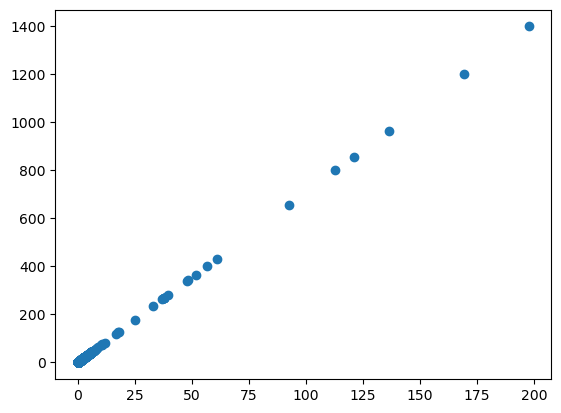

In [198]:
plt.scatter(X_train_scaled,y_train)

In [200]:
regr.intercept_

0.0

In [207]:
regr.coef_

array([0.39370028])

In [202]:
#fonction affine
coeffSalt = openfoodfacts[['salt_100g','sodium_100g']].dropna().sample(2)
a = (coeffSalt.sodium_100g.iloc[1] - coeffSalt.sodium_100g.iloc[0])/(coeffSalt.salt_100g.iloc[1] - coeffSalt.salt_100g.iloc[0])
b = round(coeffSalt.sodium_100g.iloc[1] - a*coeffSalt.salt_100g.iloc[1],4)
a,b

(0.3937007874015763, -0.0)

In [ ]:
%whos